In [21]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# generating samples and noise
np.random.seed(2)
x = np.arange(-5, 5, 1)
noise = np.random.normal(0, 3, 10)

In [25]:
# creating dataframe
y = x**2 + noise
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-5,23.749726
1,-4,15.831200
2,-3,2.591412
3,-2,8.920812
4,-1,-4.380307


In [27]:
# function that plots training/testing data
# df is the full dataset
# df_select labels the training dataset
def PlotCurveFunction(df, df_select):
    # define labels of the testing set
    df_deselect = np.invert(df_select)
    # build training and testing dataset
    df_train = df.iloc[df_select]
    df_test = df.iloc[df_deselect]

    # setup the figure
    plt.figure(figsize=(6,4), dpi=600, facecolor='w', edgecolor='k')
    # plot the data points
    plt.scatter(df_train.iloc[:,0], df_train.iloc[:,1], facecolors='none', edgecolors='g', s=50, label='train')
    plt.scatter(df_test.iloc[:,0], df_test.iloc[:,1], facecolors='none', edgecolors='r', s=50, label='test')

    # add label to axes
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend()

    # plot the true smooth function
    x_plt = np.arange(-5, 5, 0.1)
    plt.plot(x_plt, x_plt**2, color='blue')

    plt.show()

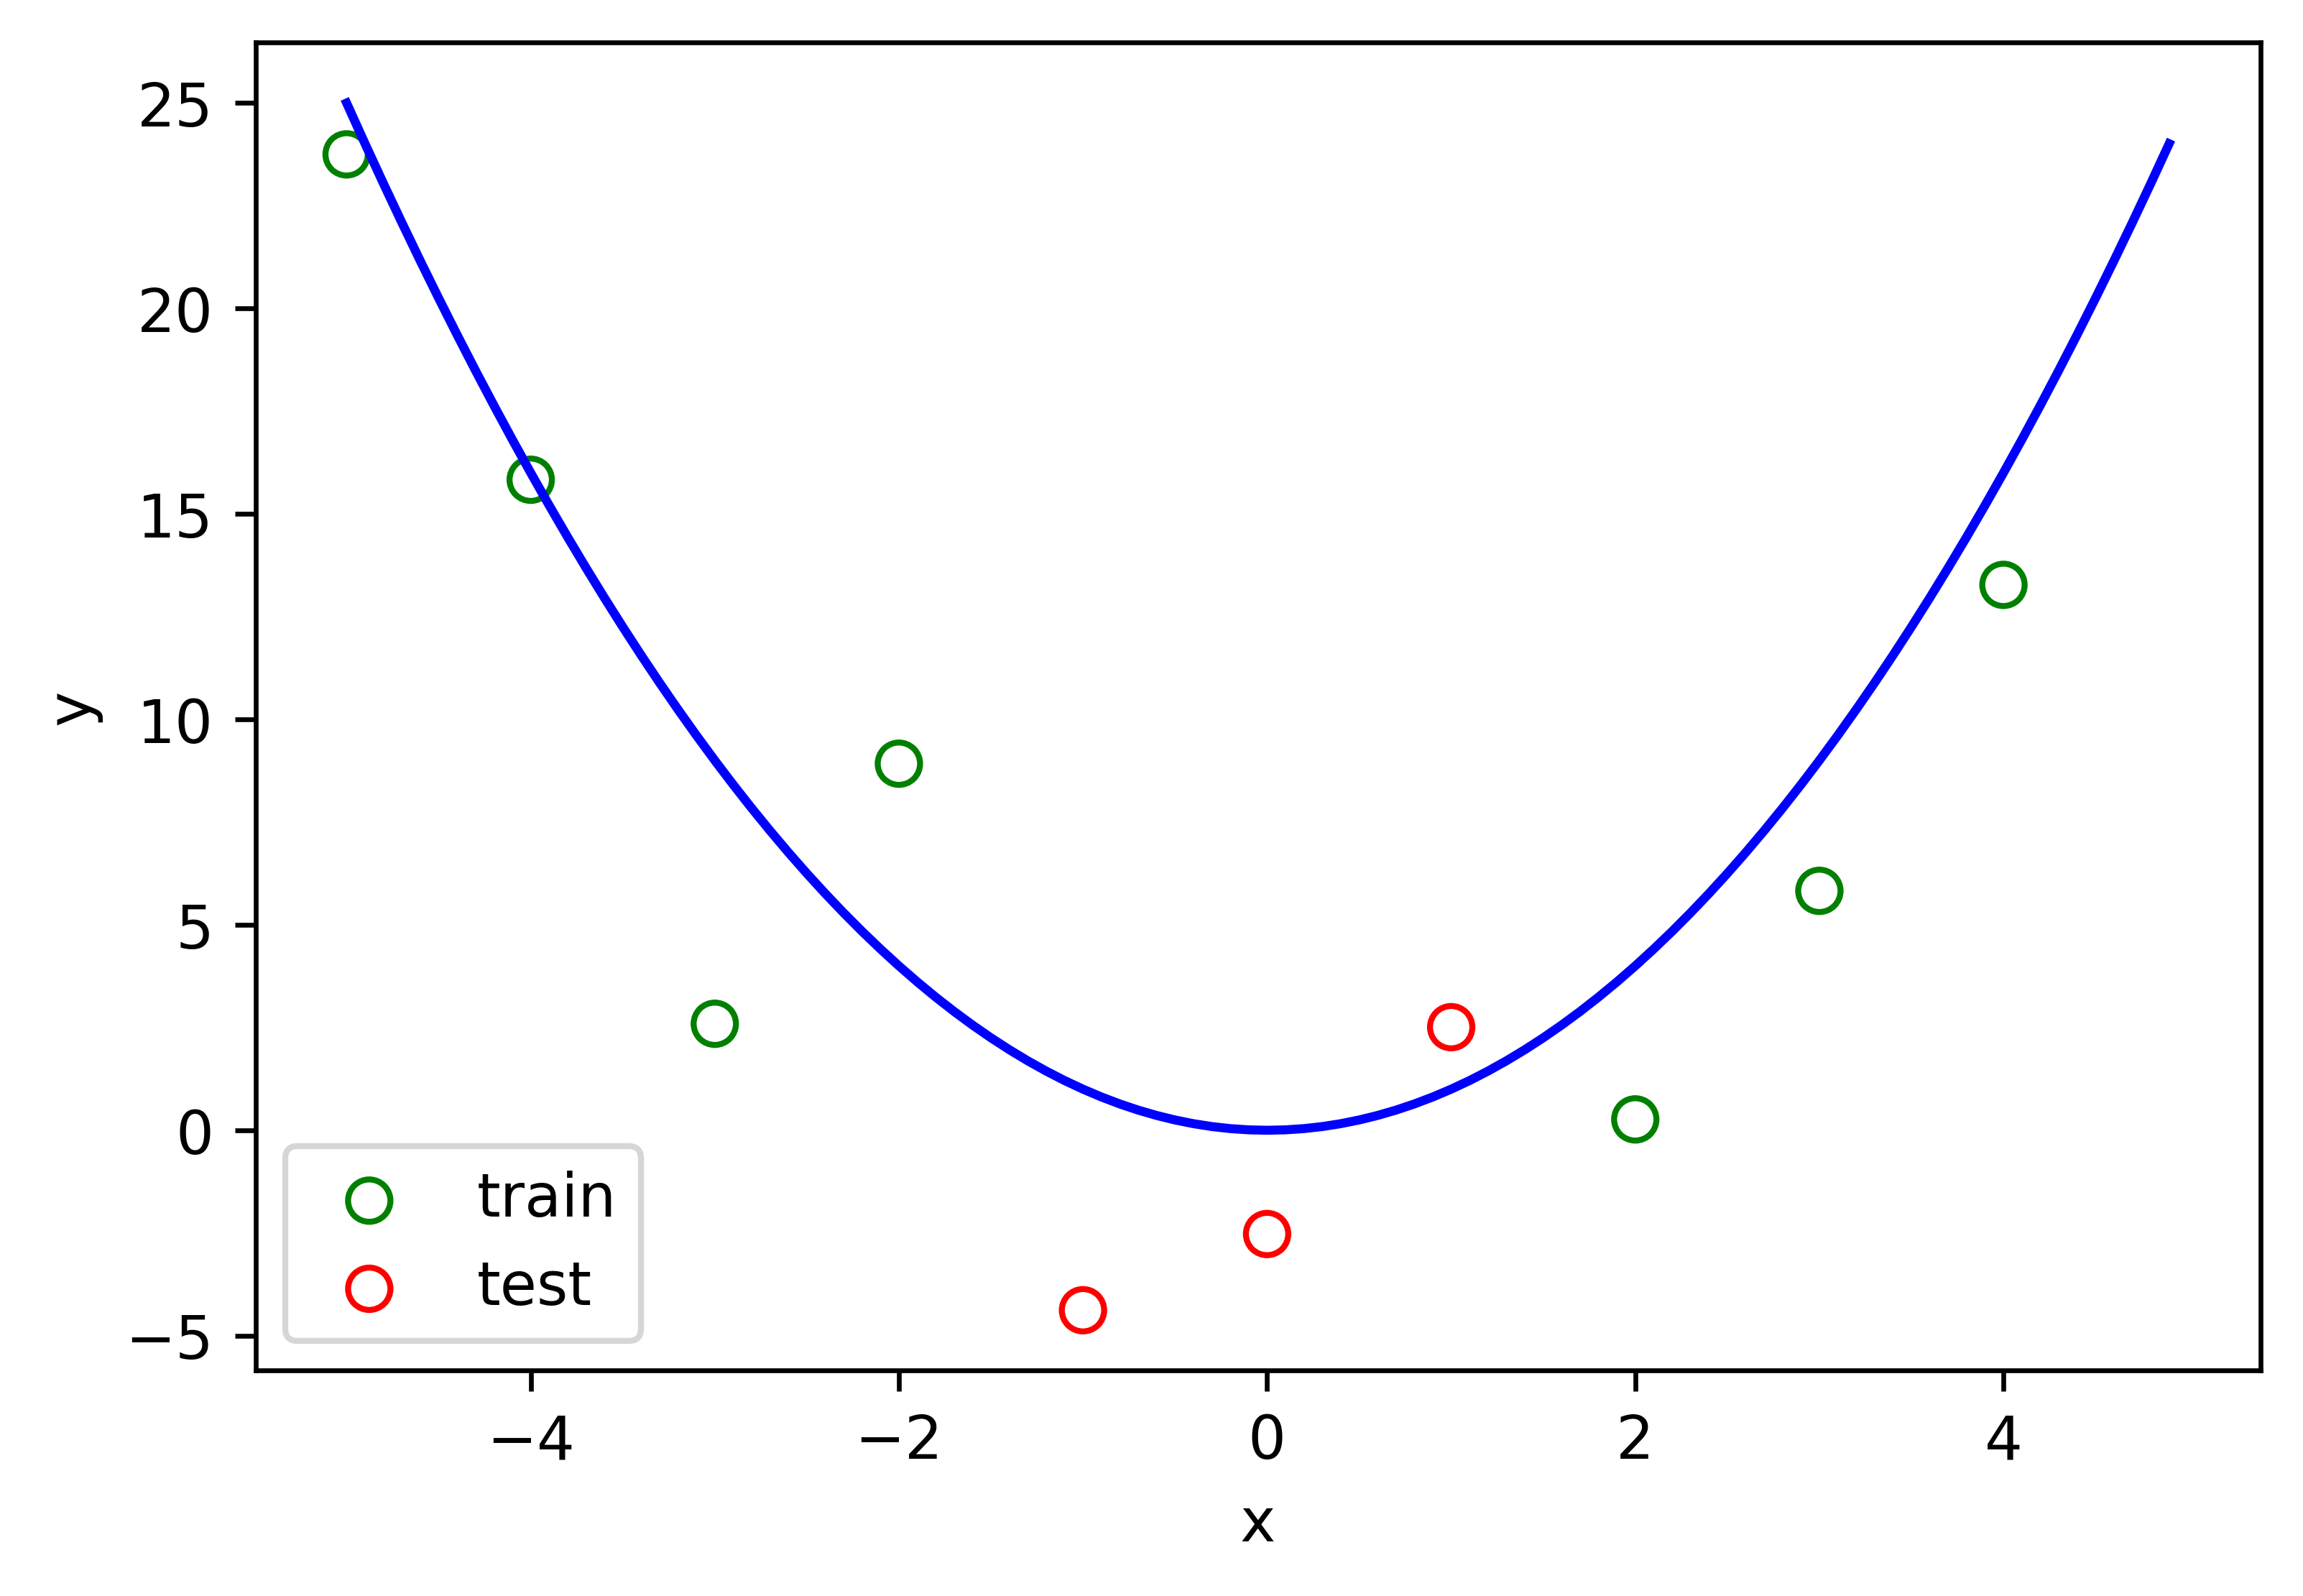

In [29]:
df_select = [True, True, True, True, False, False, False, True, True, True]
PlotCurveFunction(df, df_select)

In [42]:
def TstOvrFt(df, df_select, l_degree):

    # define labels of the testing set
    df_deselect = np.invert(df_select) 
    # build training and testing data set
    df_train = df.iloc[df_select]
    train_x = df_train.iloc[:,0]
    train_y = df_train.iloc[:,1]
    
    df_test = df.iloc[df_deselect]
    test_x = df_test.iloc[:,0]
    test_y = df_test.iloc[:,1]
    
   # polynomial transform, e.g. (x1, x2, x1x2, x1^2, x2^2) for 2 degree polynomial transformation
    polynomial_features= PolynomialFeatures(degree = l_degree)

    # x.reshape((len(x), 1)) transform x into a array of (len(x), 1) for future regression fitting
    x_axis = np.arange(-5,5,0.1)
    x_poly = polynomial_features.fit_transform(x_axis.reshape((len(x_axis), 1)))
    
    # convert data type of train_x and test_x to array
    train_x=np.array(train_x)
    test_x=np.array(test_x)
    x_poly_train = polynomial_features.fit_transform(np.reshape(train_x,(len(train_x), 1)))
    x_poly_test = polynomial_features.fit_transform(np.reshape(test_x,(len(test_x), 1)))

    # fit linear regression for polynomial features
    linear_regression = LinearRegression().fit(x_poly_train, train_y)

    # calculate the mean squared error
    in_sample_error = mean_squared_error(linear_regression.predict(x_poly_train), train_y)
    out_sample_error = mean_squared_error(linear_regression.predict(x_poly_test), test_y)

    # setup the figure
    plt.figure(figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')
    # set the y_axis limit
    plt.ylim(-5,35)
    # plot the data points
    plt.scatter(train_x,train_y, facecolors='none', edgecolors = 'g', s=50, label = 'train')
    plt.scatter(test_x,test_y, facecolors='none', edgecolors = 'r', s=50, label = 'test')
    
    # add label to axes
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend()
    
    # plot the true smooth function
    x_plt = np.arange(-5, 5, 0.1)
    plt.plot(x_plt,x_plt**2,color='blue',label = 'True Curve')
    
    # plot calculated curve, w0 + w1*x + w2*x^2...+wn*x^n
    plt.plot(x_axis, linear_regression.intercept_ + np.dot(x_poly, linear_regression.coef_), color = 'red', label = 'Fitted Curve w/ degree %i'%l_degree)

    # specify the location of the legend
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
    
    # print related information
    print('Degree is: ', l_degree)
    print("In sample error: %.2f"% in_sample_error)
    print("Out sample error: %.2f"% out_sample_error)

    
    return in_sample_error, out_sample_error

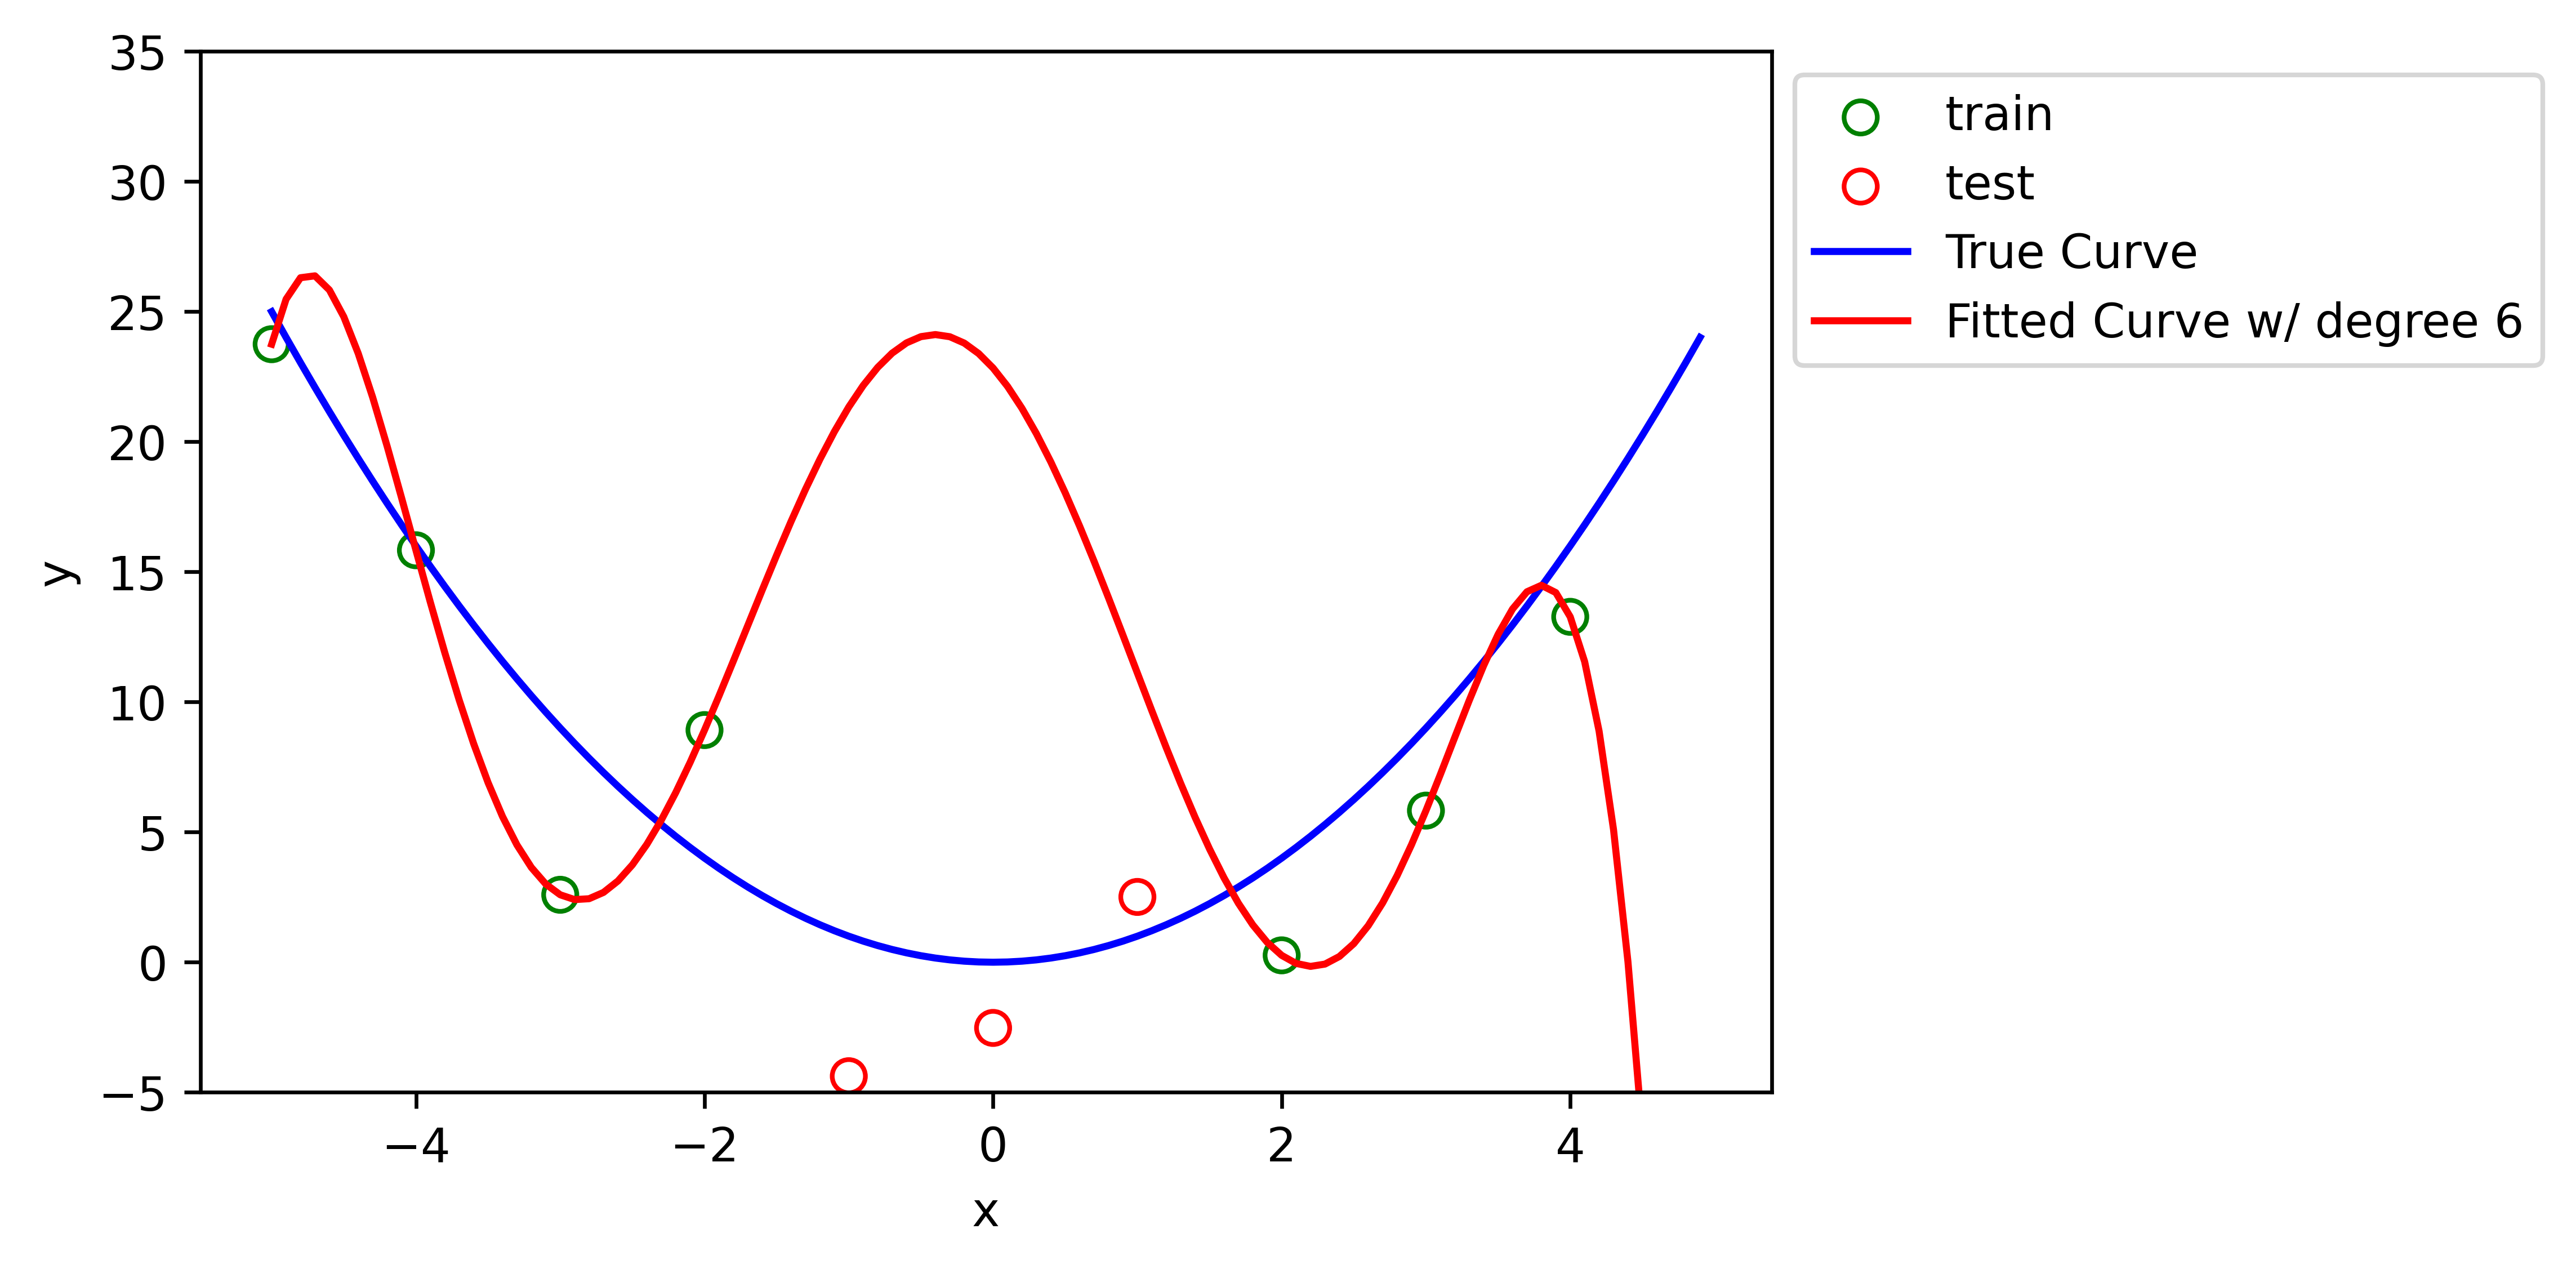

Degree is:  6
In sample error: 0.00
Out sample error: 459.53


(8.606120221393454e-24, 459.534718366755)

In [44]:
dt_select = [True, True, True, True, False, False, False, True, True, True]
TstOvrFt(df, df_select, 6) # y = w_0 + w_1*x + w_2*X^2 + w_3*X^3 + w_4*X^4 + w_5*X^5 + w_6*X^6

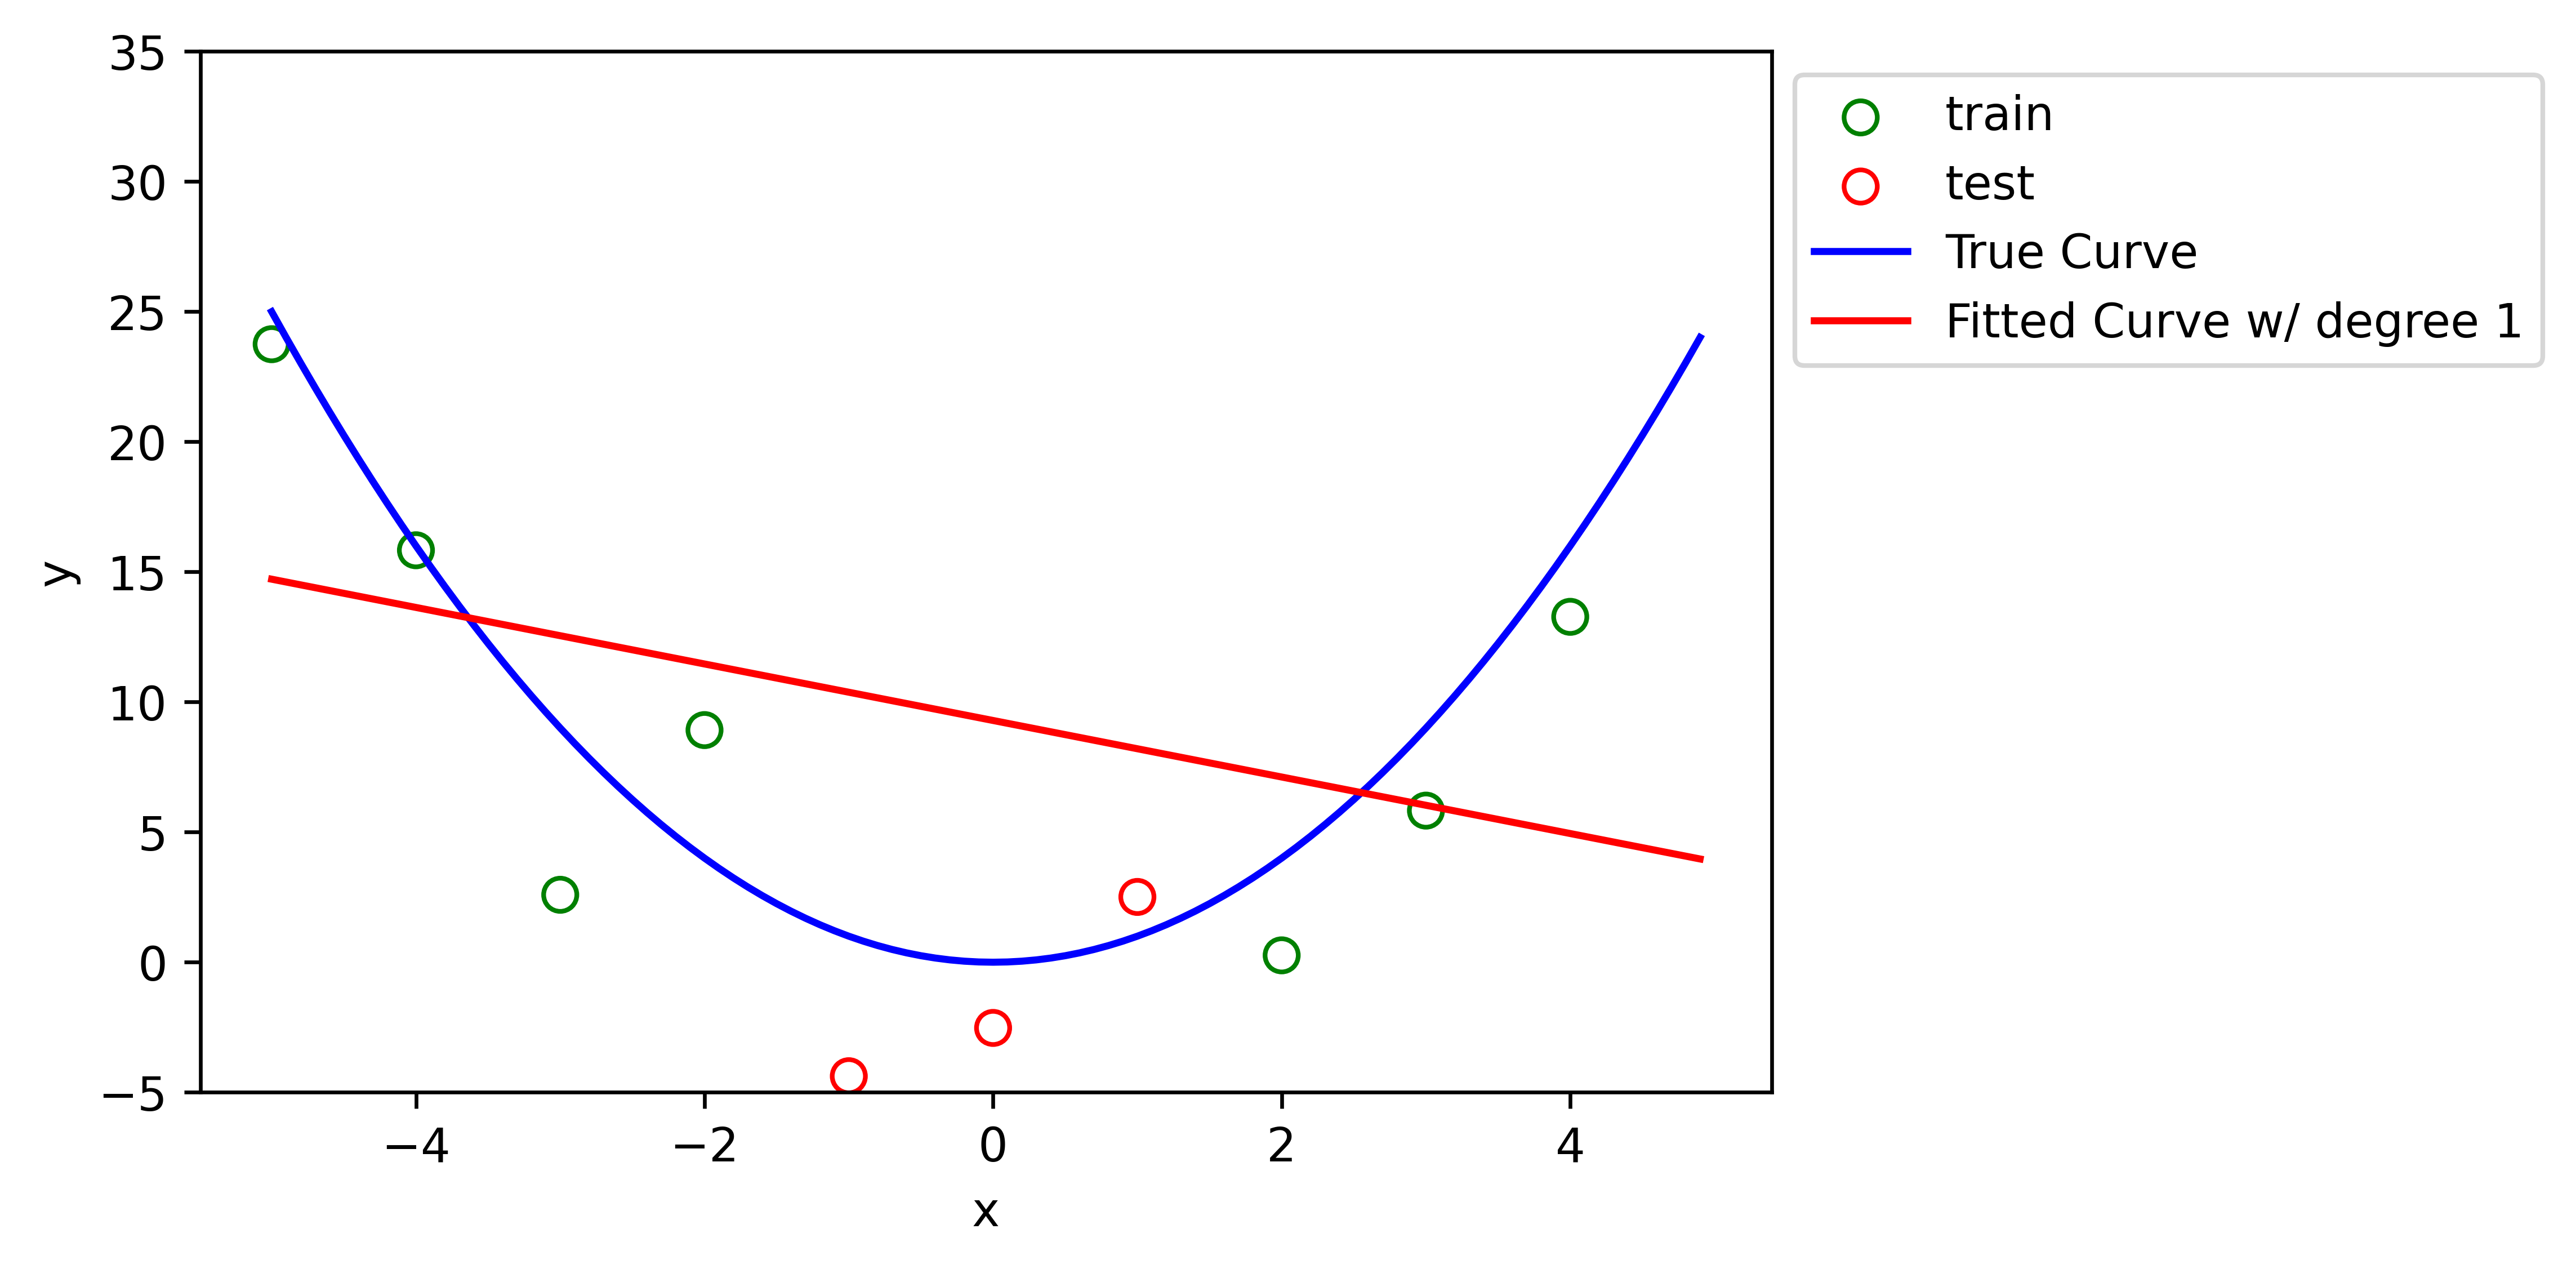

Degree is:  1
In sample error: 44.04
Out sample error: 129.92


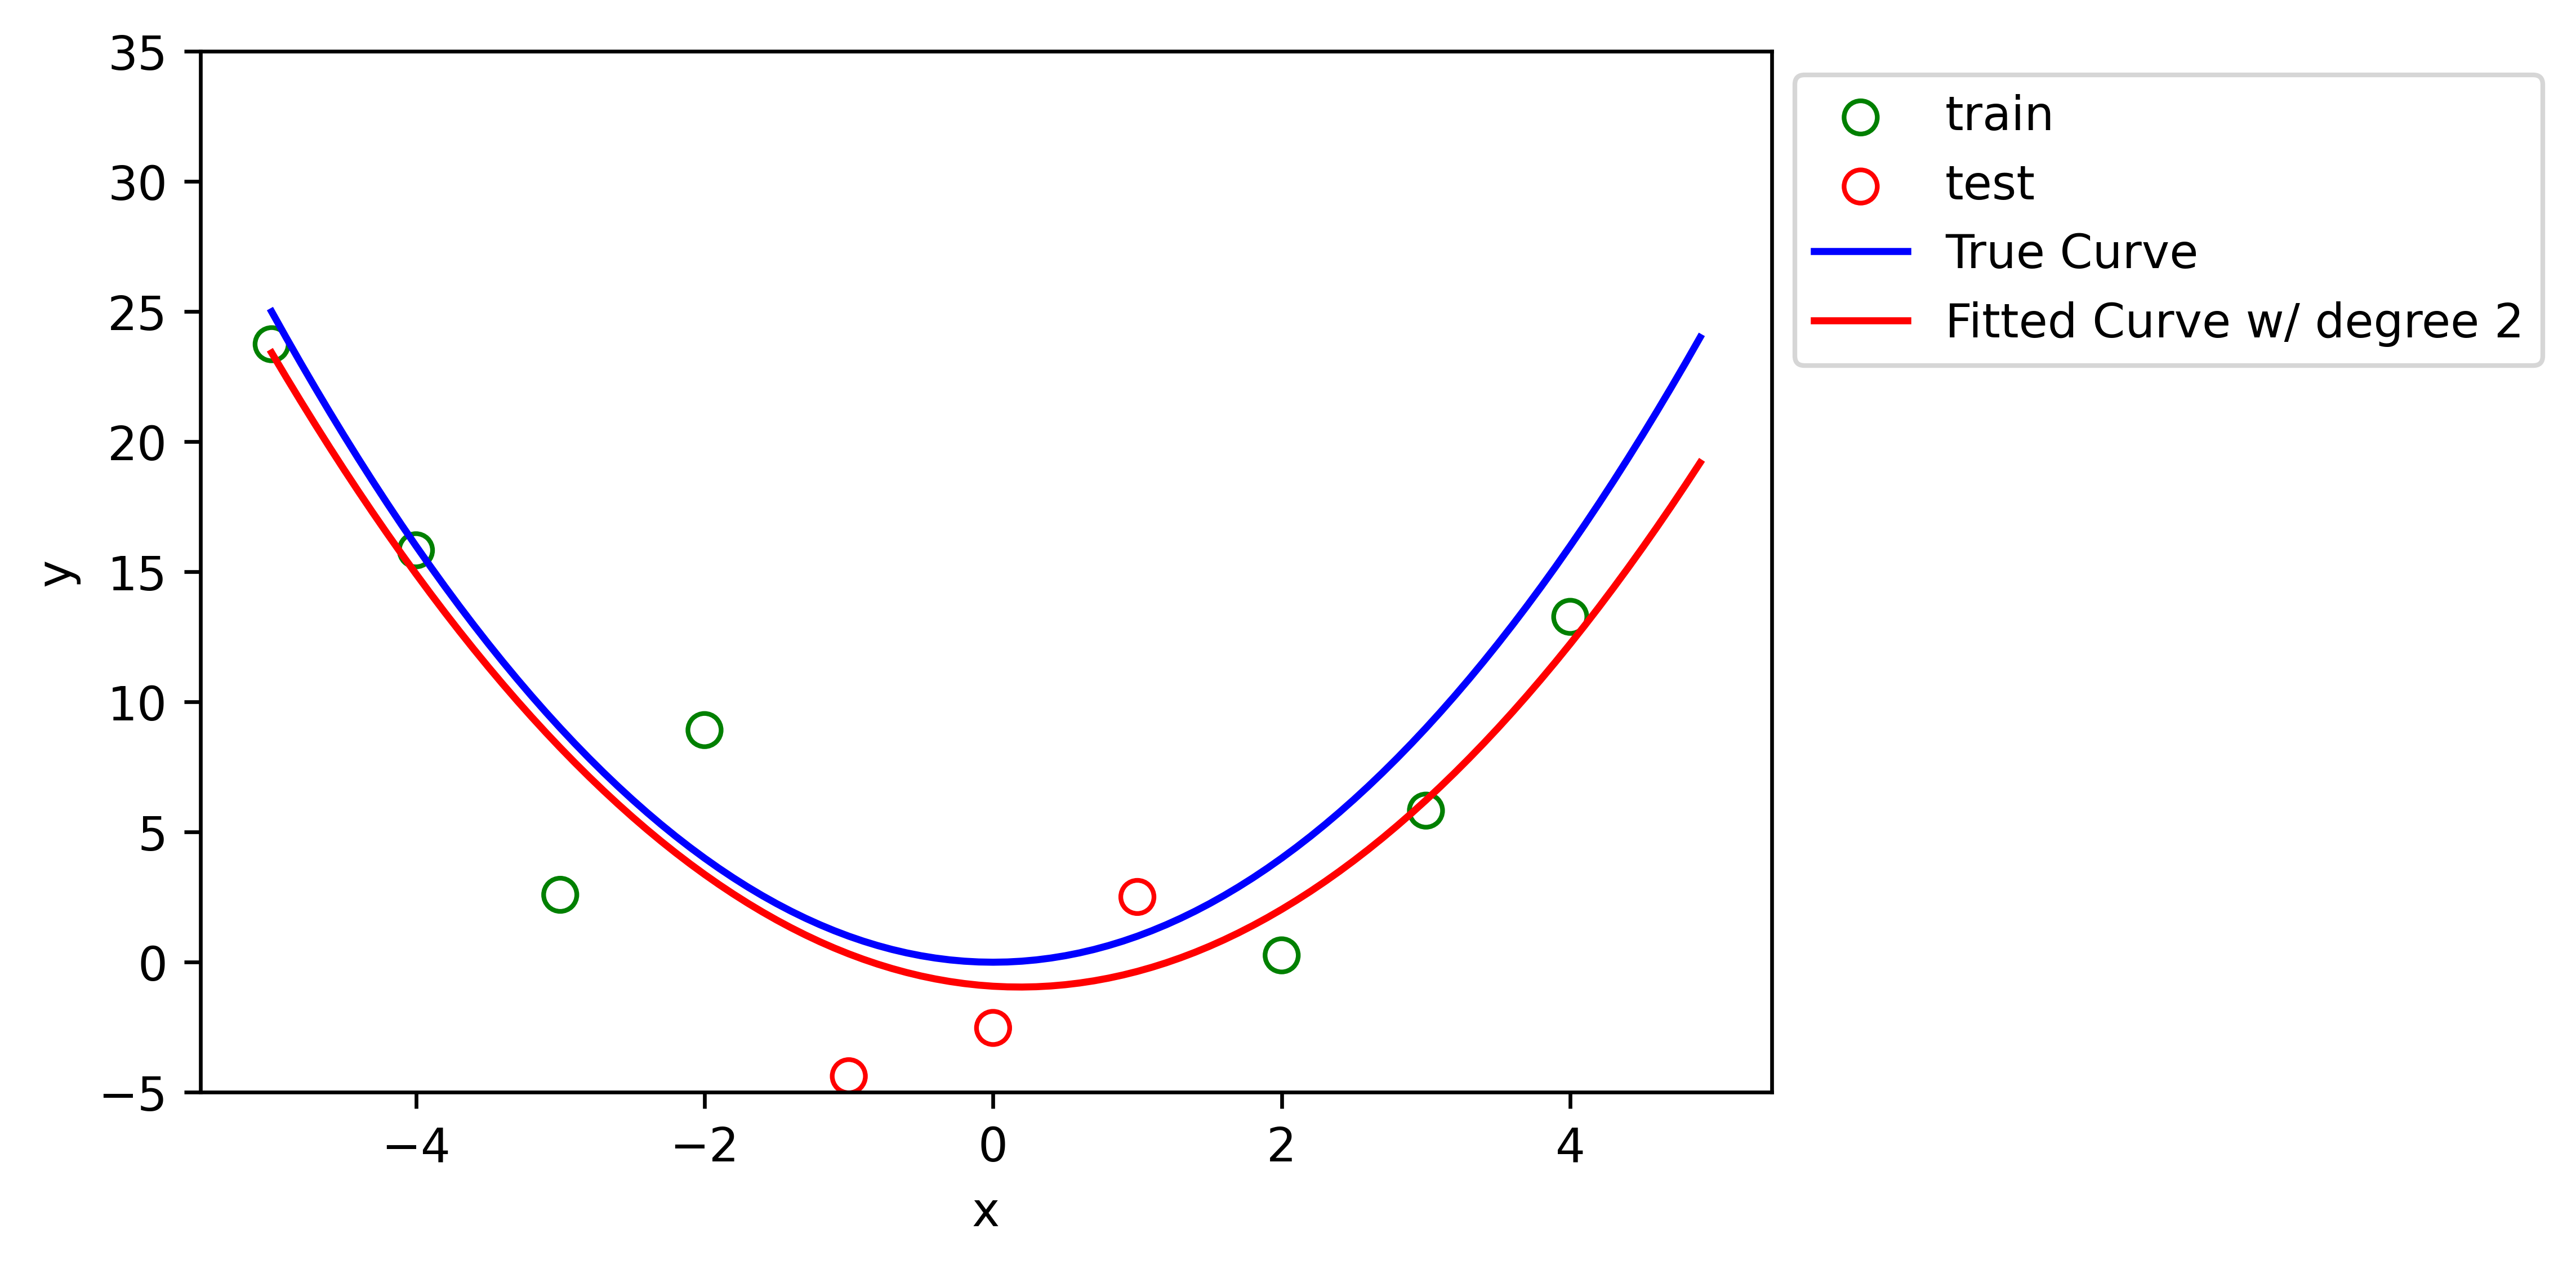

Degree is:  2
In sample error: 9.71
Out sample error: 10.95


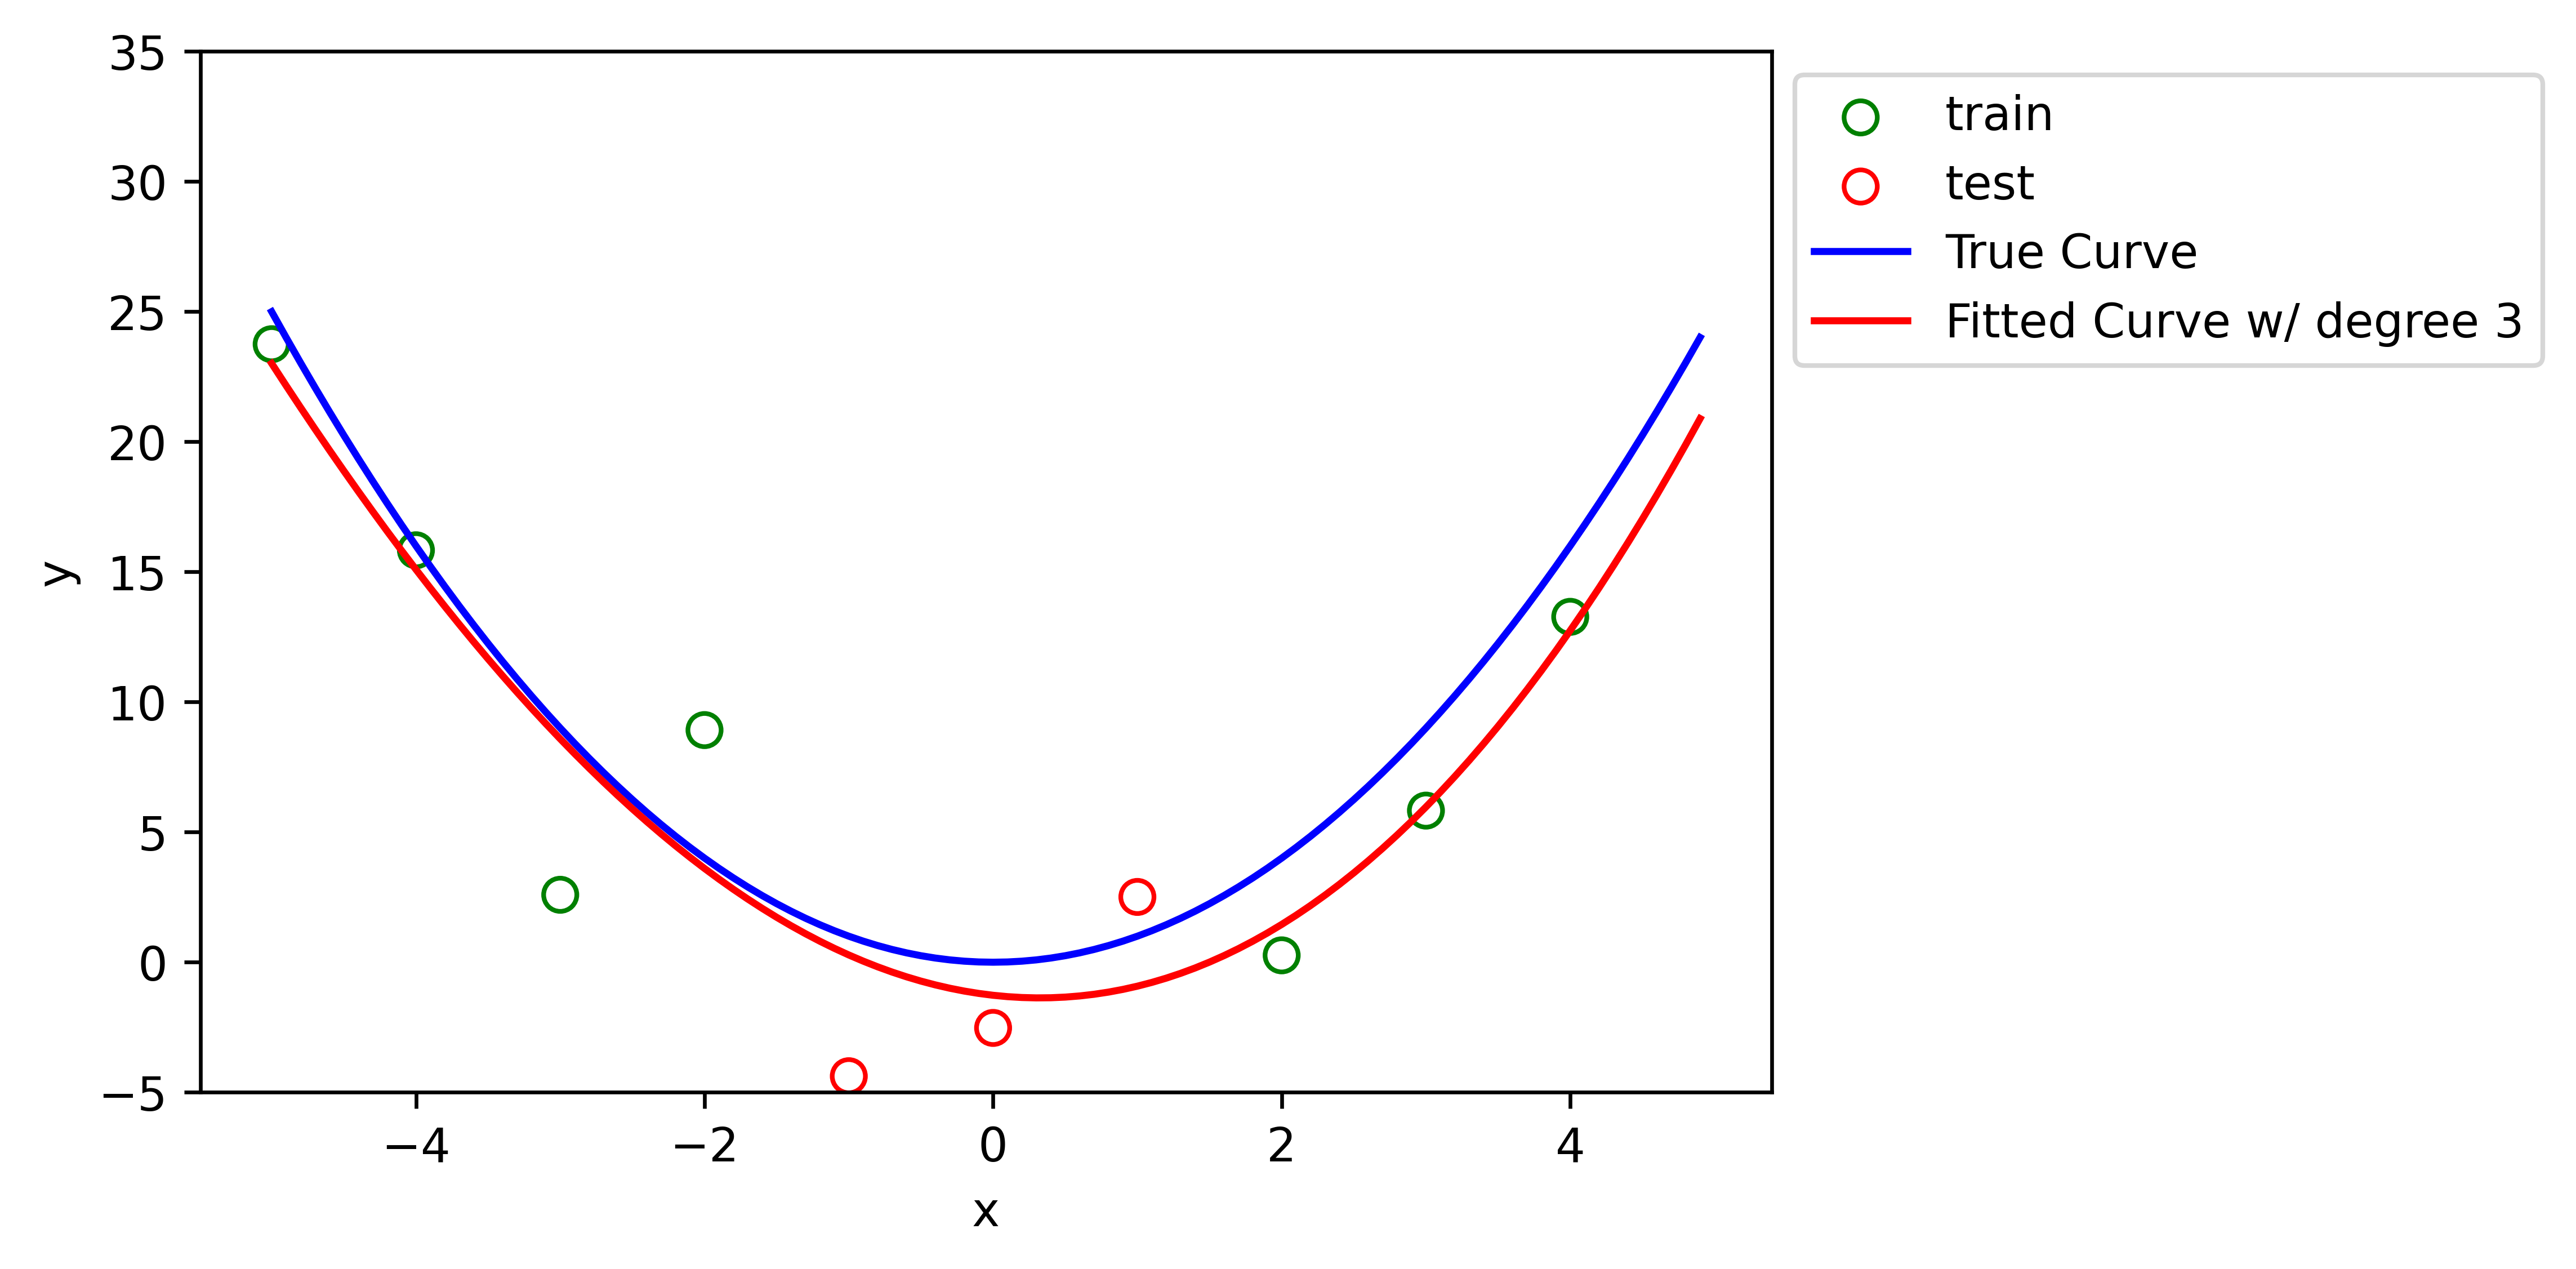

Degree is:  3
In sample error: 9.57
Out sample error: 11.68


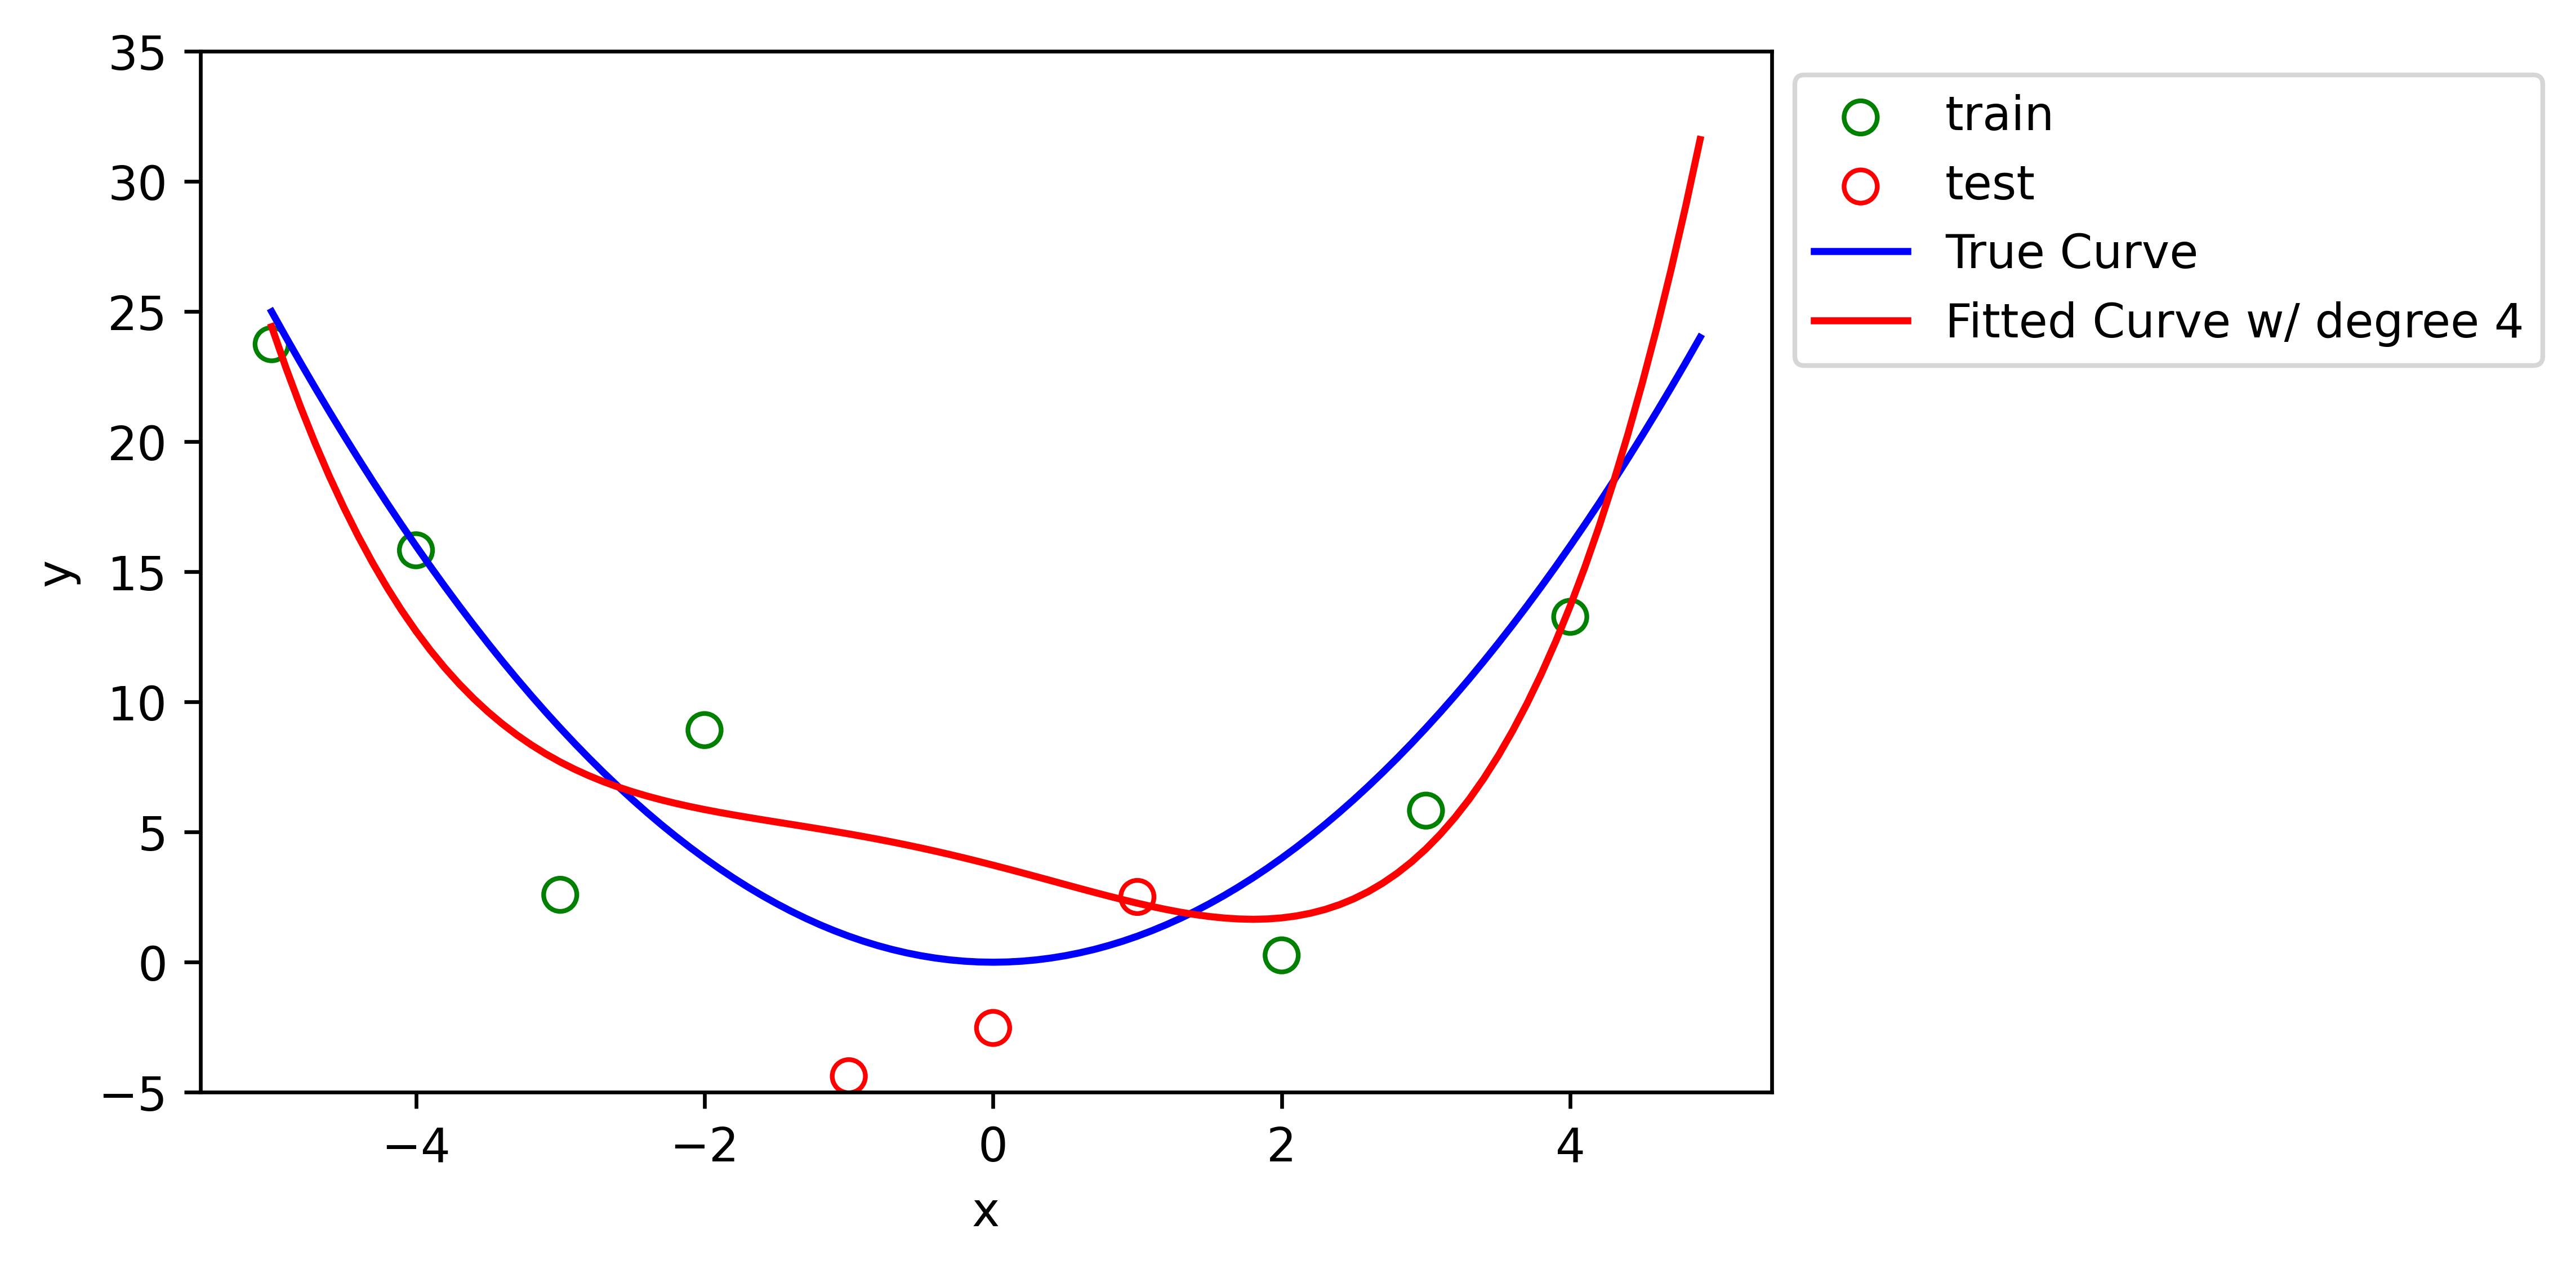

Degree is:  4
In sample error: 7.13
Out sample error: 41.96


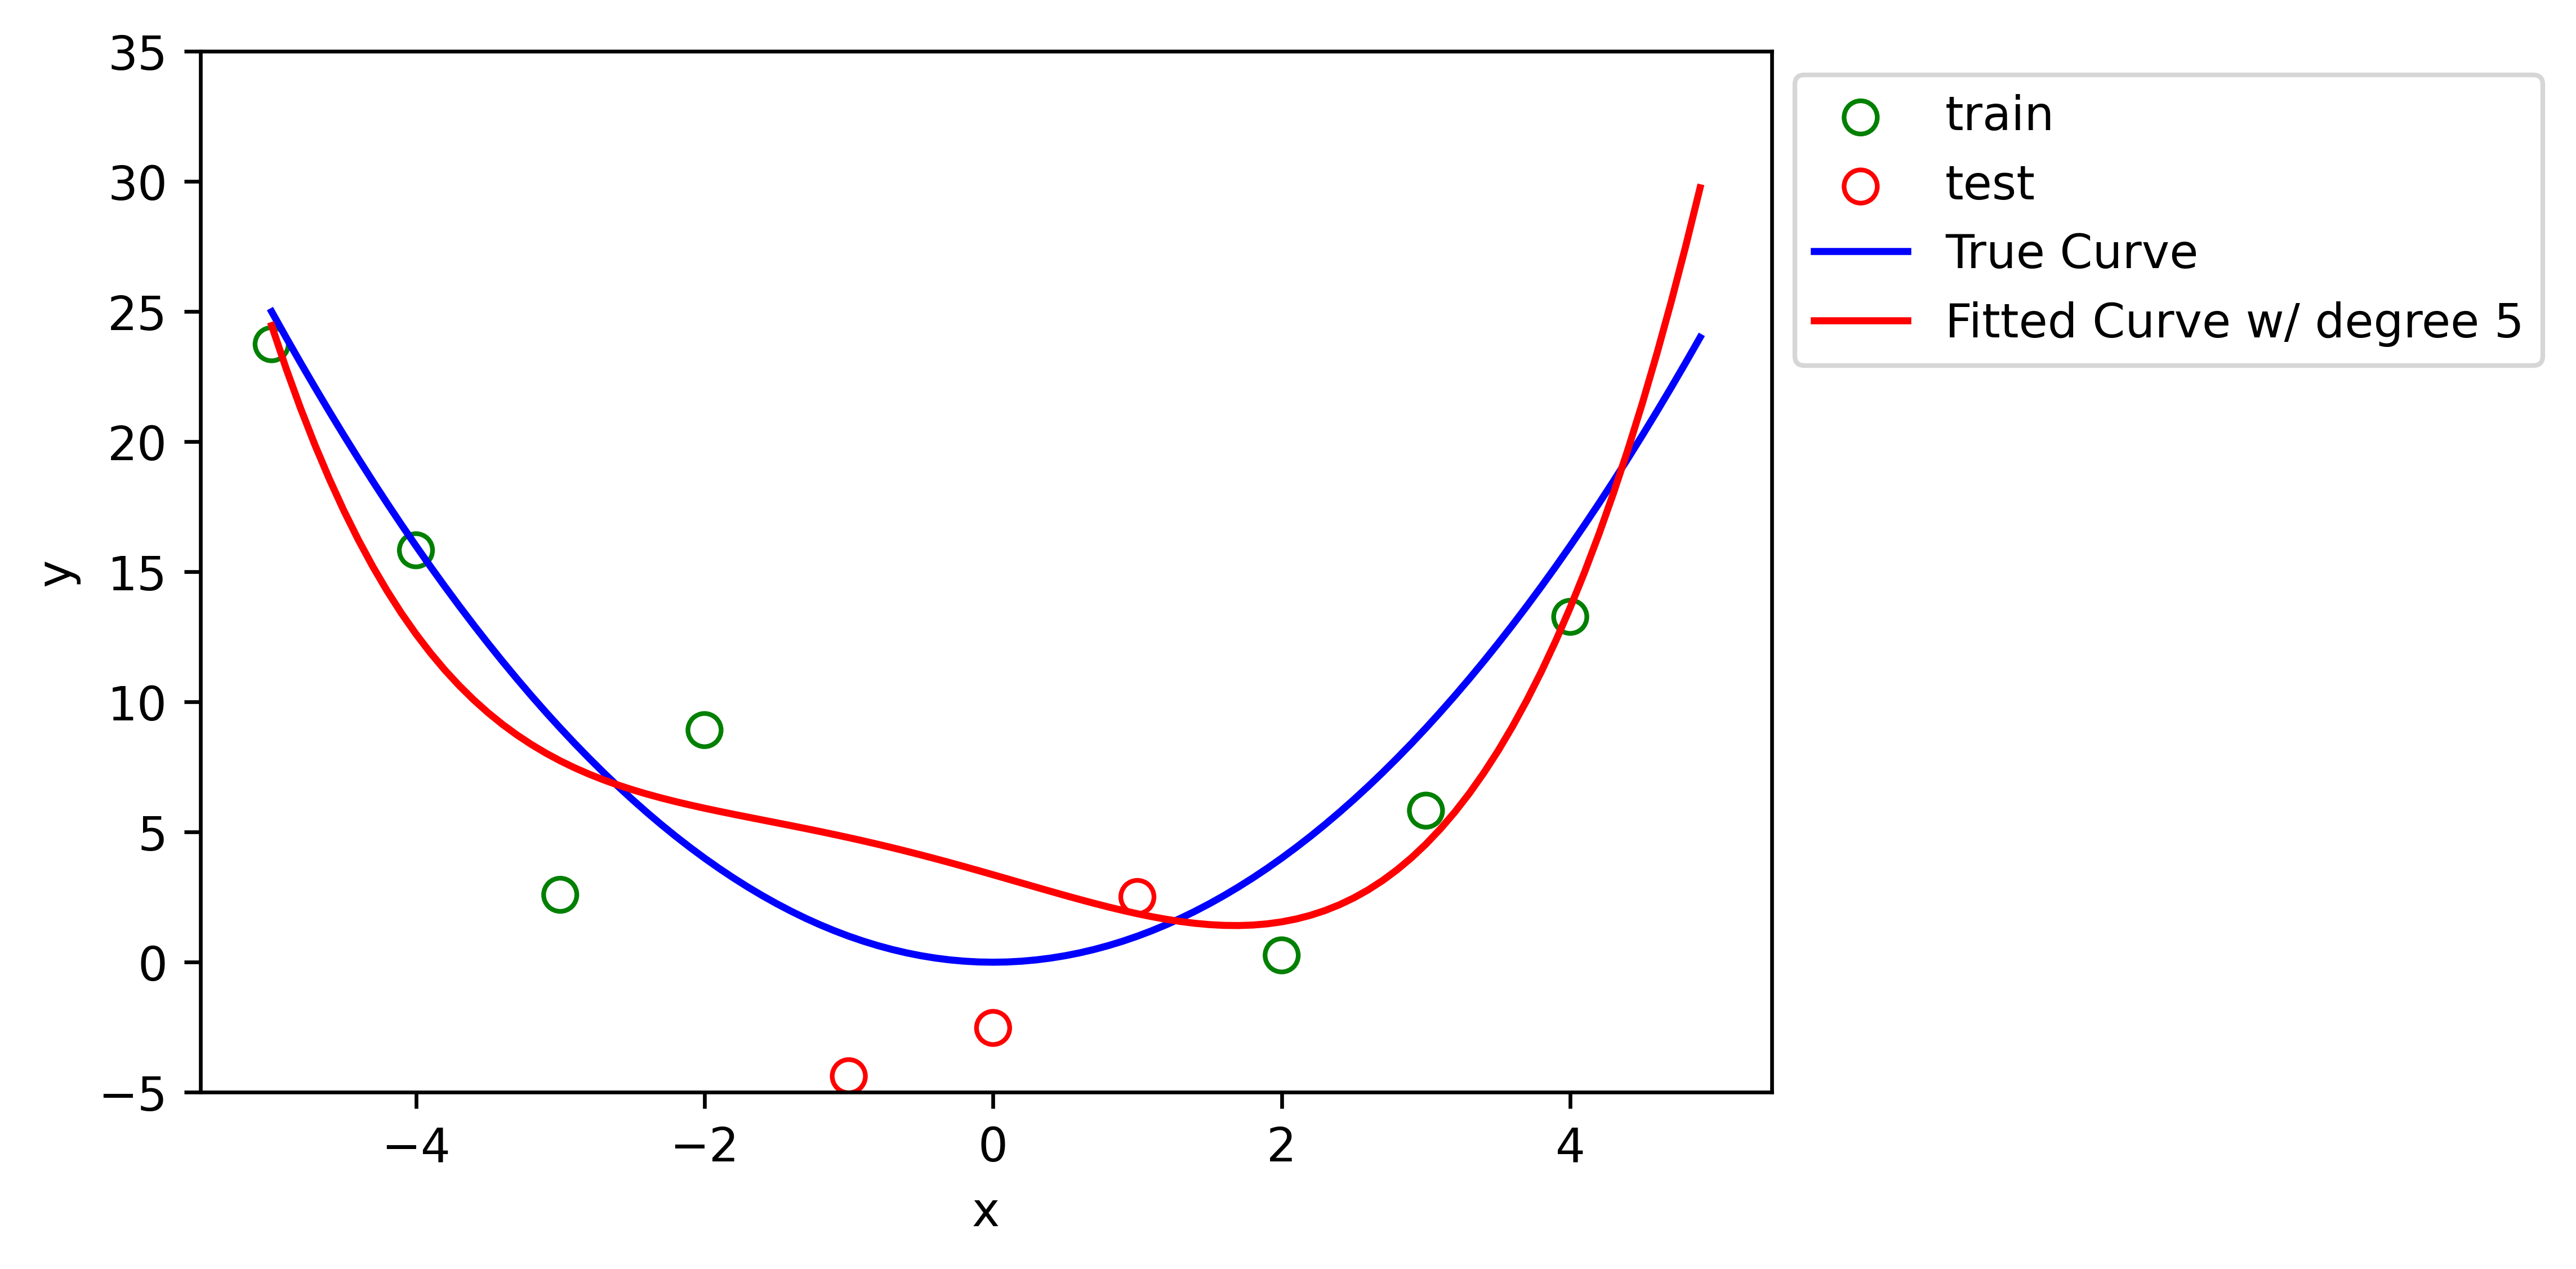

Degree is:  5
In sample error: 7.12
Out sample error: 39.70


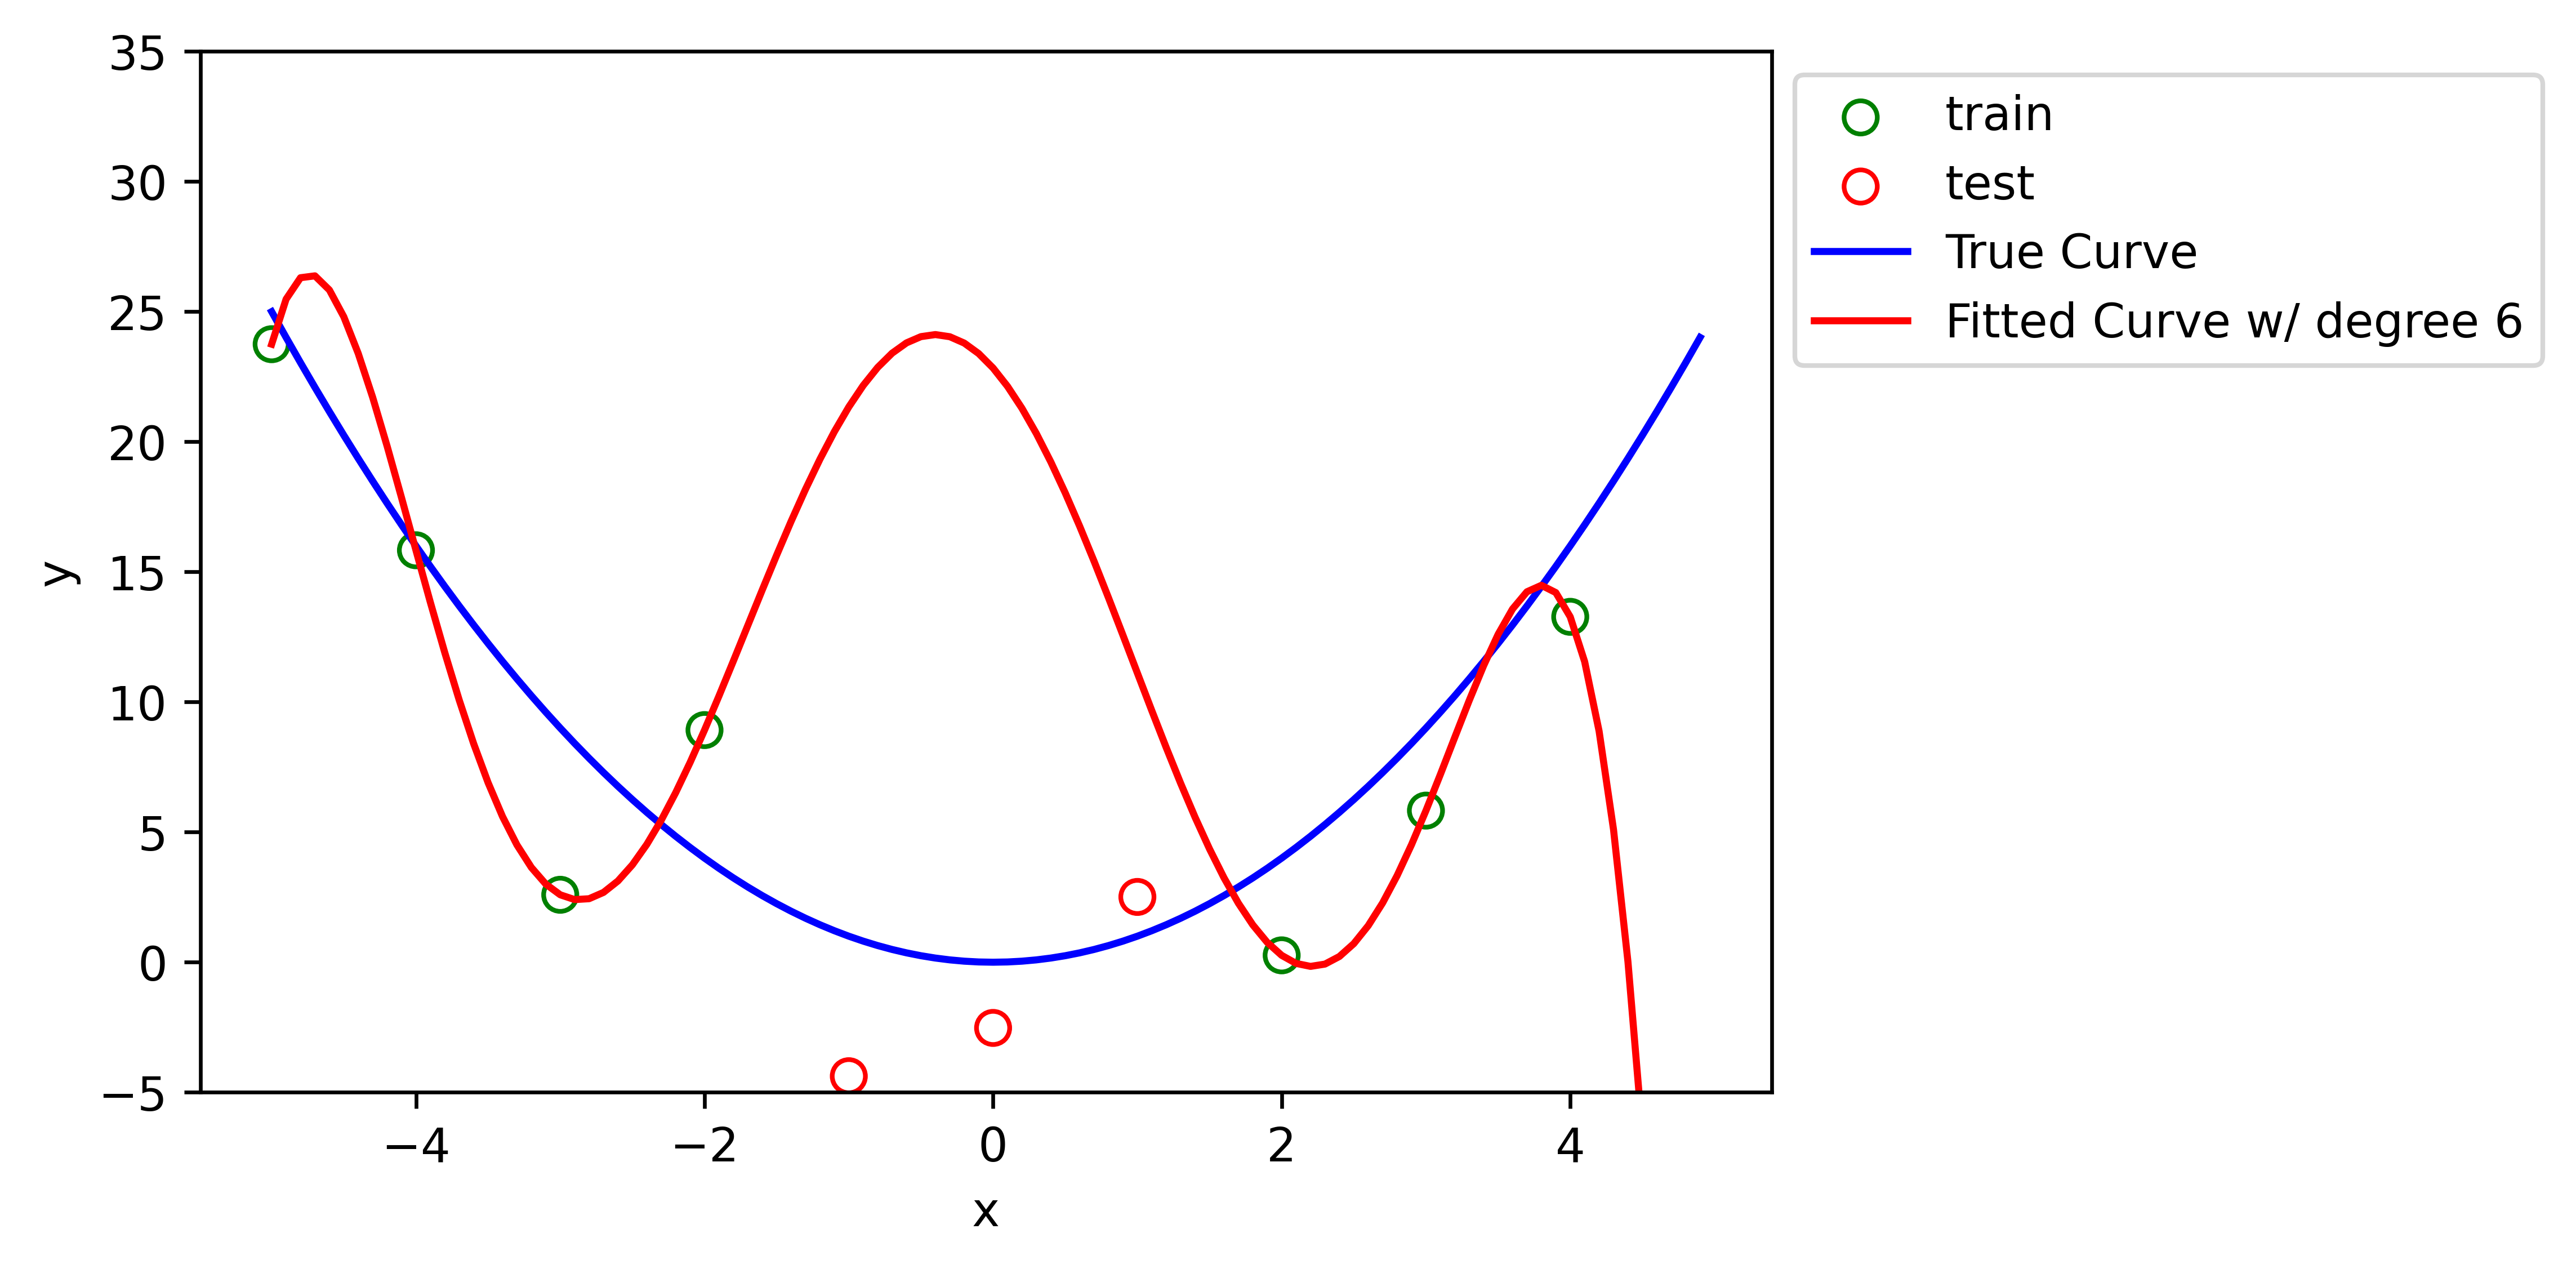

Degree is:  6
In sample error: 0.00
Out sample error: 459.53


In [46]:
# prepare the lists to store outputs
num_coef_list = list()
in_sample_error_list = list()
out_sample_error_list = list()

# set the traiing dataset
df_select = [True, True, True, True, False, False, False, True, True, True]
# run the model for different degrees
for i in range(1, 7):
    [in_sample_error, out_sample_error] = TstOvrFt(df, df_select, i)
    num_coef_list.append(i)
    in_sample_error_list.append(in_sample_error)
    out_sample_error_list.append(out_sample_error)




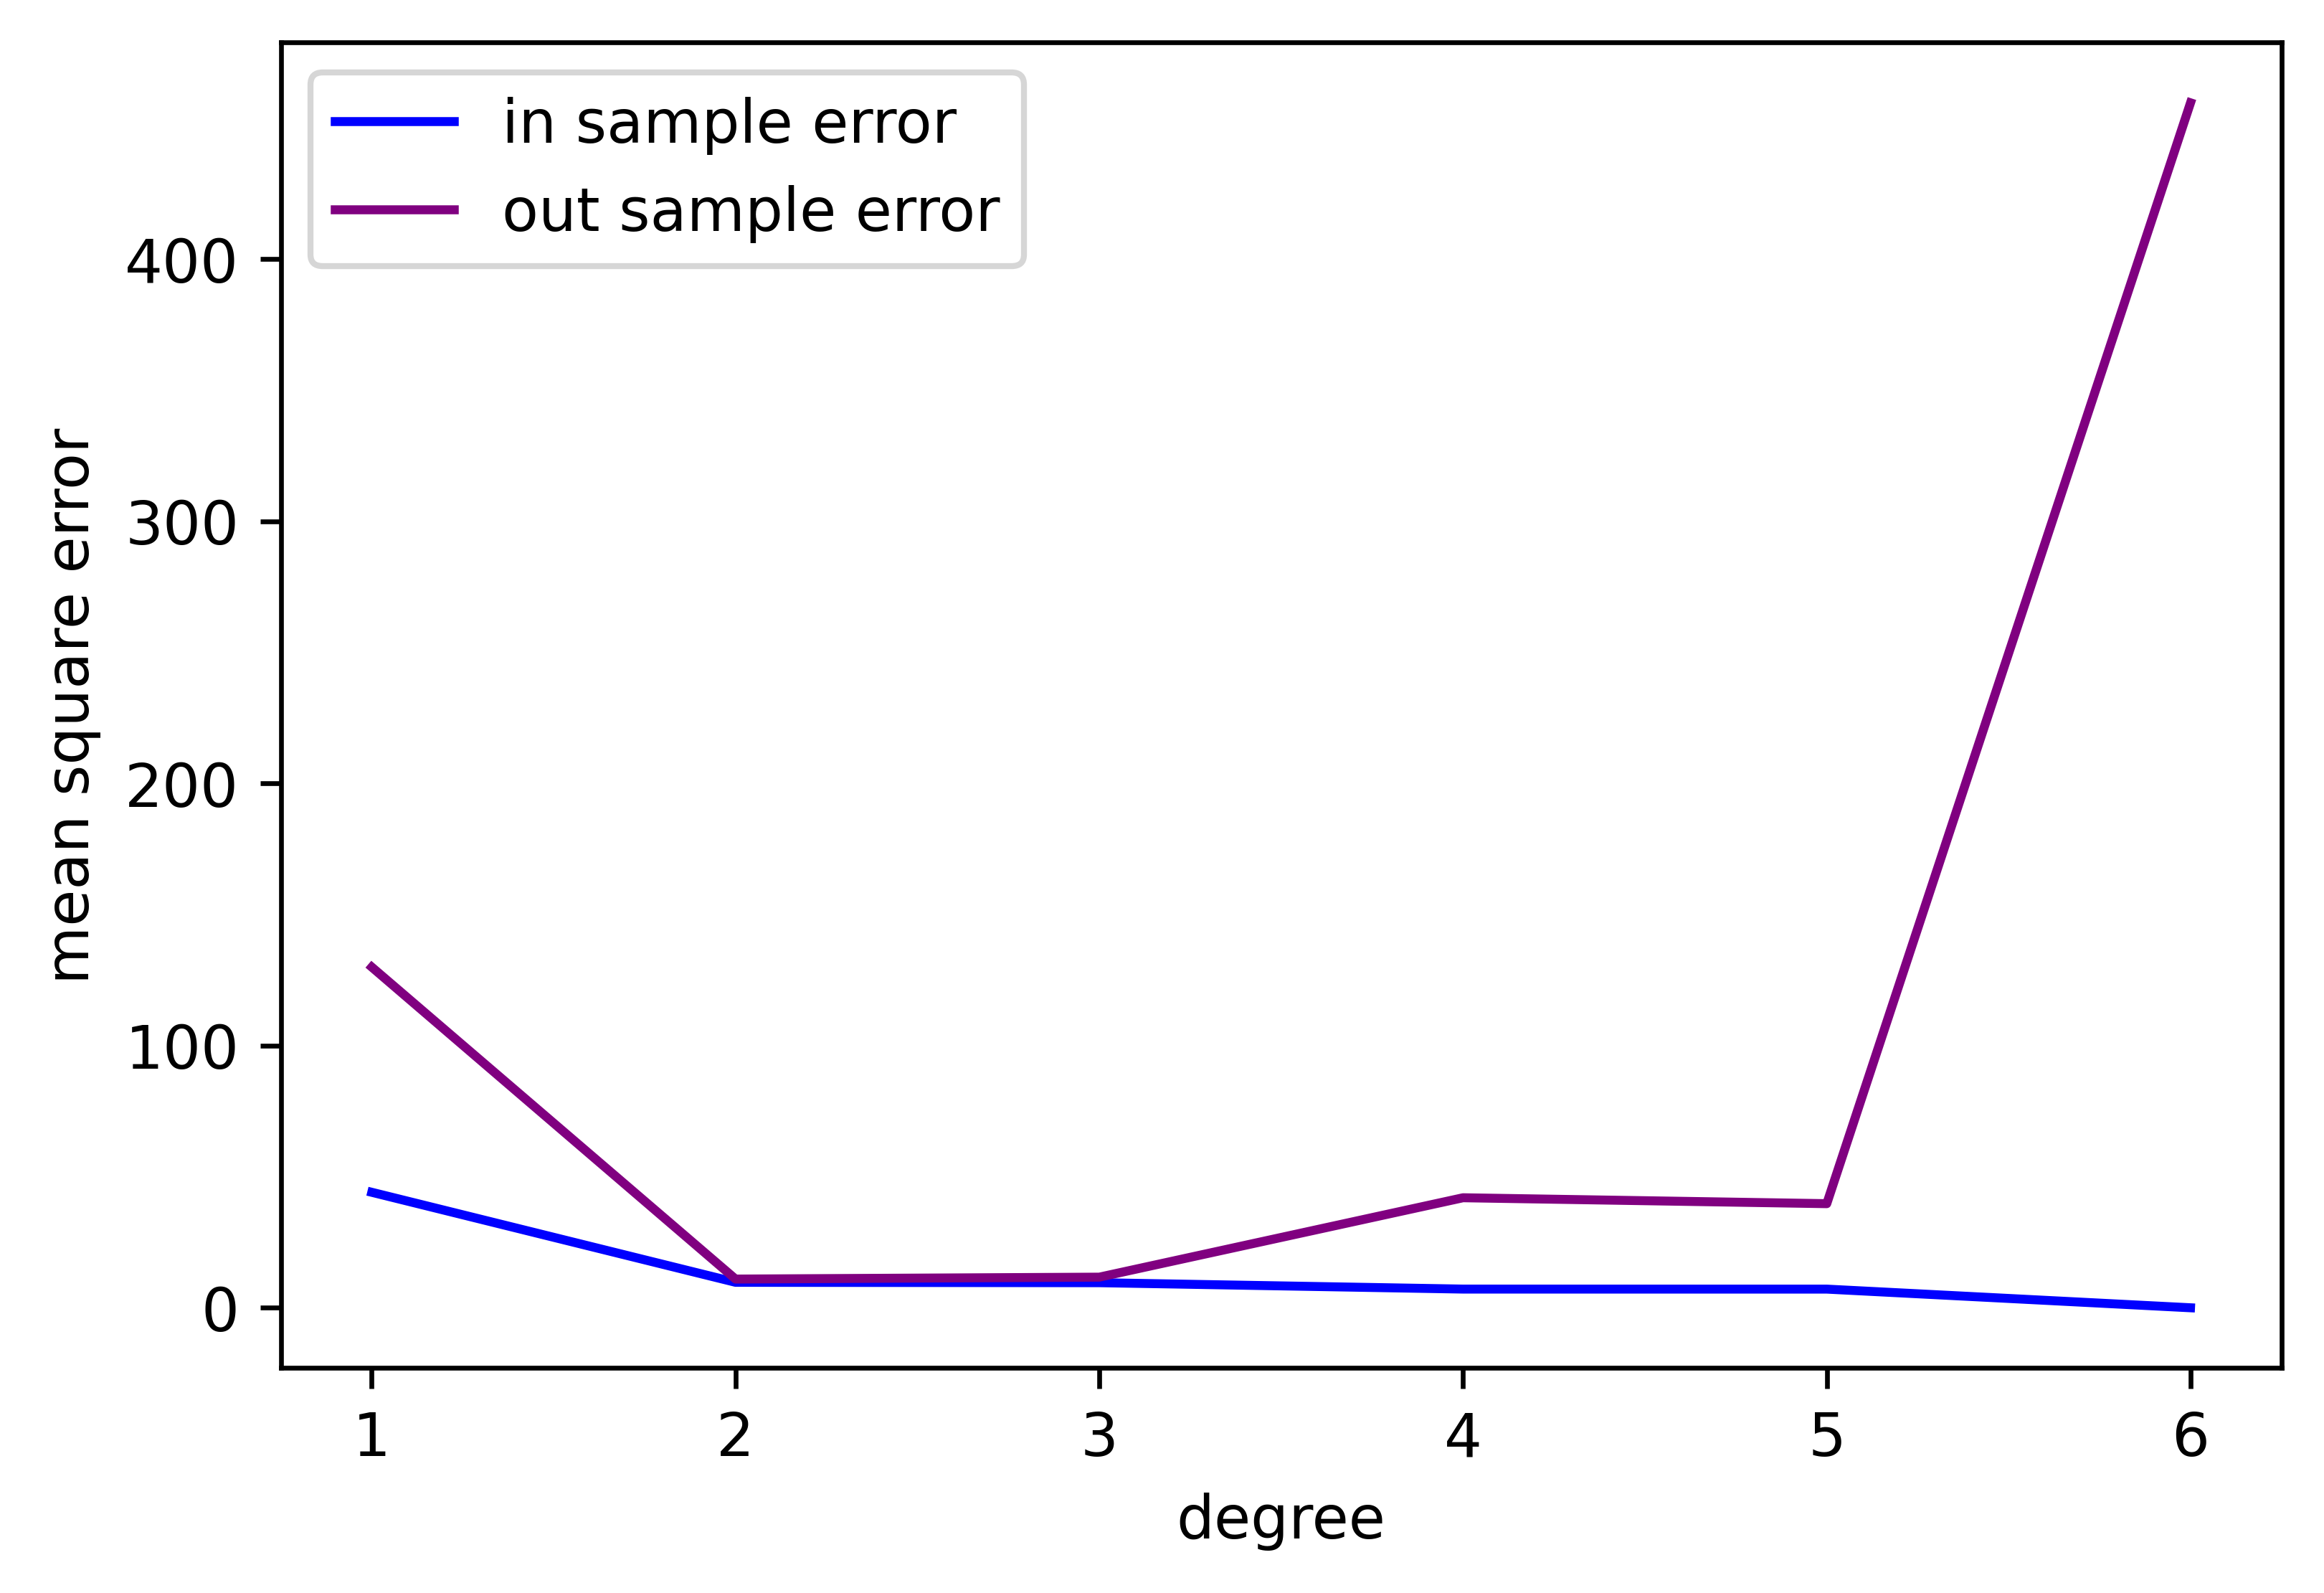

In [48]:
# define the figure
plt.figure(figsize=(6,4), dpi=600, facecolor='w', edgecolor='k')
plt.plot(num_coef_list, in_sample_error_list, color='blue', label='in sample error')
plt.plot(num_coef_list, out_sample_error_list, color='purple', label='out sample error')
plt.ylabel('mean square error')
plt.xlabel('degree')
plt.legend()
plt.show()